In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [10]:
df = pd.read_csv(r"C:\Users\sreek\OneDrive\Desktop\ACM\breast-cancer.csv")
print("✅ Dataset loaded successfully.")
print(df.head())


✅ Dataset loaded successfully.
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_w

In [11]:
# Drop the 'id' column
df.drop("id", axis=1, inplace=True)

# Encode target variable: Malignant (M) → 1, Benign (B) → 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\n✅ Cleaned data:")
print(df.head())



✅ Cleaned data:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...       

In [12]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print("\n✅ Features and target separated.")
print("Feature shape:", X.shape)
print("Target shape:", y.shape)



✅ Features and target separated.
Feature shape: (569, 30)
Target shape: (569,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Train-test split done.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



✅ Train-test split done.
Training samples: 455
Testing samples: 114


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling complete.")



✅ Feature scaling complete.


In [15]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

print("\n✅ Models initialized.")



✅ Models initialized.


In [16]:
results = {}

for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        "accuracy": acc,
        "confusion_matrix": cm,
        "report": report
    }

    print(f"\n📌 {name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)



🔍 Training Random Forest...

📌 Random Forest Results:
Accuracy: 0.9737
Confusion Matrix:
[[72  0]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔍 Training AdaBoost...

📌 AdaBoost Results:
Accuracy: 0.9737
Confusion Matrix:
[[72  0]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔍 Training XGBoost...

📌 XGBoost Results:
Accuracy: 0.9737
Confusion Matrix:
[[72  0]
 [ 3 

C:\Users\sreek\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:41:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


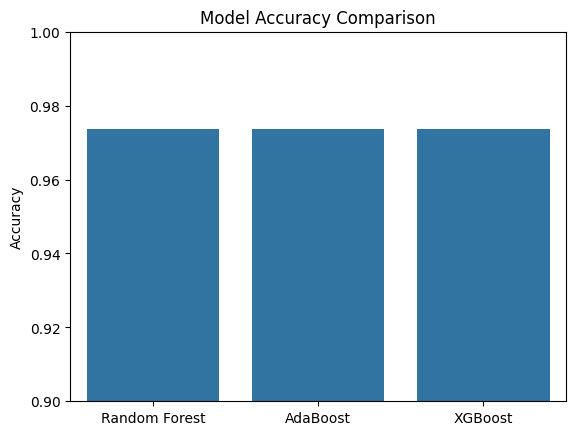

In [17]:
accuracies = [results[m]["accuracy"] for m in models]
model_names = list(models.keys())

sns.barplot(x=model_names, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()


In [ ]:
_